## Testing: &thinsp; featues of dataset

In [3]:
import xarray as xr
import numpy as np
from os.path import expanduser
home = expanduser("~")
import skimage.measure as skm
import matplotlib.pyplot as plt
import cartopy

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [13]:
def plot_scene(scene, cmap='Reds', title='', vmin=None, vmax=None, fig_width=20 ,fig_height=10):
    projection = cartopy.crs.PlateCarree(central_longitude=180)
    lat = scene.lat
    lon = scene.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(fig_width, fig_height))
    scene.plot(transform=cartopy.crs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())
    ax.set_title(title)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [10]:
def plot_timeseries(y, variable_name='', series_type ='', title='', xmin = None, ymin = None):
    plt.figure(figsize=(25,5))
    plt.plot(y)
    plt.axhline(y=y.mean(dim='time'), color='k')
    plt.title(title)
    plt.ylabel(variable_name)
    plt.xlabel(series_type)
    plt.ylim([xmin,ymin])

In [6]:
model = 'GFDL-CM3'
experiments =[
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

variables = [
    # 'precip',
    # 'tas',
    # 'wap500',
    # 'wap',
    # 'cl',
    # 'hus',
    'hur',
]
variable = variables[0]


# ds = xr.open_dataset(home + '/Documents/data/cmip5/ds/GFDL-CM3_orig')
# ds = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_' + variable + '_' + experiment + '.nc')
ds = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '_orig/' + model + '_' + variable + '_' + experiment + '.nc')
ds

<xarray.Dataset>
Dimensions:  (plev: 23, time: 360, lat: 36, lon: 144)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    hur      (time, plev, lat, lon) float32 ...
Attributes:
    description:  relative humidity (in all pressure levels)

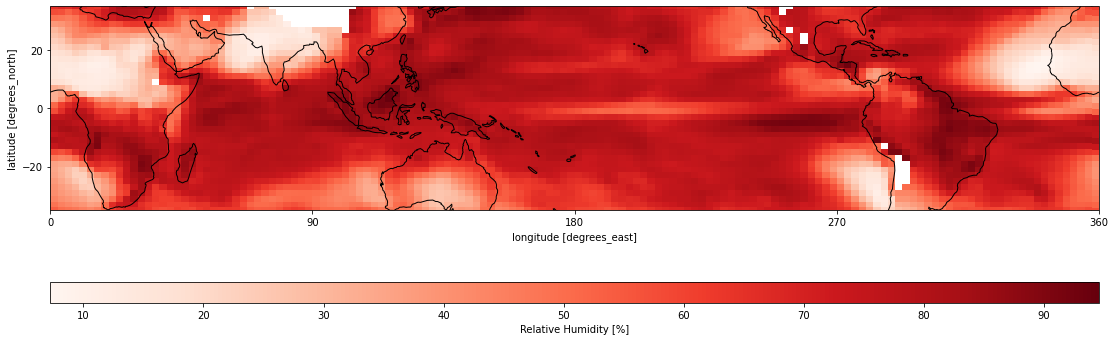

In [85]:
plot_scene(ds[variable].isel(time=0).sel(plev=850e2), 'Reds')
plot_scene(ds[variable].mean(dim ='time').sel(plev=850e2), 'Reds')
# plot_scene(ds['cloud_high'].isel(time=0), 'Reds')
# plot_scene(ds['cloud_high'].mean(dim ='time'), 'Reds')

In [7]:
rh_mean = (ds.hur * ds.plev).sum(dim='plev') / ds.plev.sum(dim='plev')
rh_mean

<xarray.DataArray (time: 360, lat: 36, lon: 144)>
array([[[49.28715567, 48.04435771, 47.39307277, ..., 53.74110865,
         52.51344245, 51.0423122 ],
        [45.98189169, 44.73429095, 43.92288328, ..., 50.56695361,
         49.11604282, 47.66103226],
        [42.5685744 , 41.42239977, 40.97238562, ..., 47.23563605,
         45.67302551, 44.21117849],
        ...,
        [31.78578624, 31.97195811, 31.86158688, ..., 27.36050328,
         32.26192864, 31.6845721 ],
        [35.19328564, 36.16036479, 43.16863608, ..., 35.51829553,
         37.13658282, 28.8584874 ],
        [39.89751158, 41.24783609, 50.22599619, ..., 45.65745355,
         39.99642086, 40.34122316]],

       [[48.83420971, 47.68831392, 46.46136805, ..., 52.15787066,
         50.35294726, 49.24091837],
        [45.77707293, 44.42164621, 42.67579074, ..., 50.0524078 ,
         48.09663115, 46.52427708],
        [43.96975796, 42.17468886, 40.35776463, ..., 49.12888232,
         47.22148569, 45.3665493 ],
...
        [32.80088689, 32.39381369, 31.52588749, ..., 32.5379862 ,
         35.65141844, 33.80327116],
        [37.07764993, 36.29071266, 35.81700257, ..., 44.68725659,
         34.49674512, 32.19326632],
        [42.6036619 , 41.46795651, 41.06410929, ..., 54.98895198,
         44.77101321, 43.28301305]],

       [[50.72555049, 50.51230198, 51.61495266, ..., 50.77885783,
         50.48036248, 50.82800324],
        [47.99246702, 47.52188427, 47.08400951, ..., 49.41763157,
         49.10656079, 48.67000438],
        [45.07832572, 43.93741269, 42.57706304, ..., 47.64739529,
         46.80145439, 46.02361483],
        ...,
        [32.23926508, 34.02902243, 34.70094602, ..., 25.44482631,
         30.50800575, 30.96159411],
        [38.80180867, 40.08464498, 39.94950486, ..., 36.796714  ,
         39.07213828, 30.5492479 ],
        [47.17431434, 47.79700264, 47.67808435, ..., 49.09609573,
         41.08917342, 43.97318316]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

In [9]:
def calc_sMean(var):
    aWeights = np.cos(np.deg2rad(var.lat))
    return var.weighted(aWeights).mean(dim=('lat','lon'))

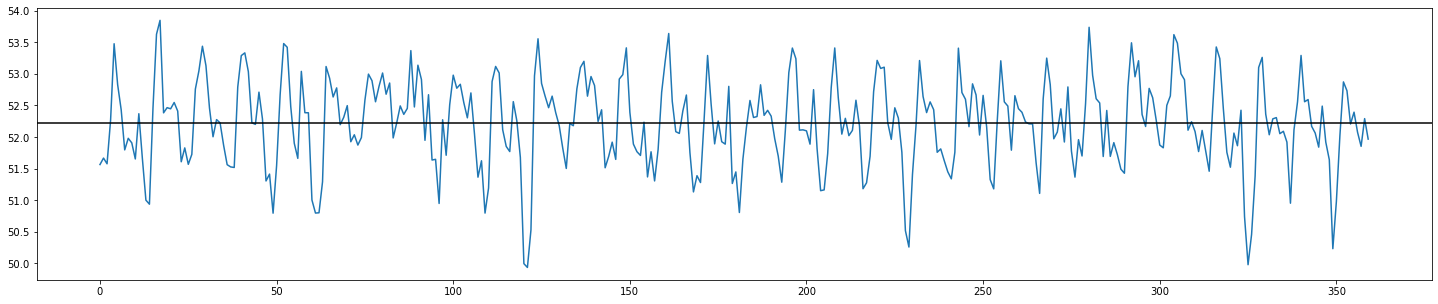

In [11]:
plot_timeseries(calc_sMean(rh_mean))

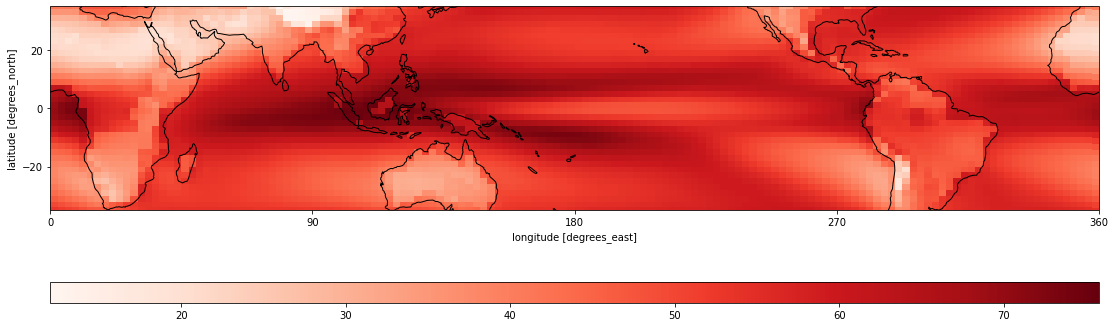

In [15]:
plot_scene(rh_mean.mean(dim='time'))